# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
pip install citipy

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [14]:
cities

['rikitea',
 'broome',
 'atar',
 'mudgal',
 'bathsheba',
 'aflu',
 'castro',
 'jamestown',
 'cape town',
 'ribeira grande',
 'burgeo',
 'bambous virieux',
 'ushuaia',
 'bluff',
 'hobart',
 'vaini',
 'mount isa',
 'atuona',
 'hithadhoo',
 'tiznit',
 'mahebourg',
 'bay roberts',
 'bethel',
 'maceio',
 'aklavik',
 'thai nguyen',
 'butaritari',
 'tuktoyaktuk',
 'saleaula',
 'kahului',
 'harboore',
 'alice springs',
 'ojinaga',
 'busselton',
 'georgetown',
 'severo-kurilsk',
 'ponta do sol',
 'albany',
 'agadir',
 'dehui',
 'thinadhoo',
 'tsihombe',
 'algiers',
 'ruatoria',
 'pangai',
 'rusera',
 'pedernales',
 'kyenjojo',
 'nizhneyansk',
 'new norfolk',
 'punta arenas',
 'nenjiang',
 'shakawe',
 'port elizabeth',
 'anadyr',
 'qaanaaq',
 'saint george',
 'husavik',
 'krasnoselkup',
 'tasiilaq',
 'attawapiskat',
 'hermanus',
 'monrovia',
 'kamenka',
 'codrington',
 'minot',
 'tlahualilo',
 'kapaa',
 'khonuu',
 'bolshevik',
 'qasigiannguit',
 'belushya guba',
 'berlevag',
 'upernavik',
 'ostr

In [15]:
place = "London"
query_url2 = url + "appid=" + weather_api_key + "&units=" +units + "&q=" + place
weather_json = requests.get(query_url2).json()
print(weather_json)

{'coord': {'lon': -0.1257, 'lat': 51.5085}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 9.91, 'feels_like': 7.07, 'temp_min': 8.89, 'temp_max': 10.56, 'pressure': 1018, 'humidity': 53}, 'visibility': 10000, 'wind': {'speed': 6.17, 'deg': 90}, 'clouds': {'all': 78}, 'dt': 1619459645, 'sys': {'type': 1, 'id': 1414, 'country': 'GB', 'sunrise': 1619412096, 'sunset': 1619464480}, 'timezone': 3600, 'id': 2643743, 'name': 'London', 'cod': 200}


In [16]:
weather_json.keys()

dict_keys(['coord', 'weather', 'base', 'main', 'visibility', 'wind', 'clouds', 'dt', 'sys', 'timezone', 'id', 'name', 'cod'])

In [17]:
weather_json['main'].keys()

dict_keys(['temp', 'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity'])

In [18]:
weather_json['main']['temp']

9.91

In [19]:
list_cities = []
temp = []
lat = []
long = []
cloud_pct = []
wind_speed = []
humidity = []
city_num = 1

for city2 in cities:
    response = requests.get(query_url + city2).json()
    
    try:
        temp.append(response['main']['temp'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloud_pct.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        humidity.append(response['main']['humidity'])
        list_cities.append(city2)
        print(f"Working on #{city_num} - {city2}")
        city_num = city_num + 1

    except:
        print("---------City not found. skipping...")
        pass

print("-------------Done------------")

Working on #1 - rikitea
Working on #2 - broome
Working on #3 - atar
Working on #4 - mudgal
Working on #5 - bathsheba
---------City not found. skipping...
Working on #6 - castro
Working on #7 - jamestown
Working on #8 - cape town
Working on #9 - ribeira grande
Working on #10 - burgeo
Working on #11 - bambous virieux
Working on #12 - ushuaia
Working on #13 - bluff
Working on #14 - hobart
Working on #15 - vaini
Working on #16 - mount isa
Working on #17 - atuona
Working on #18 - hithadhoo
Working on #19 - tiznit
Working on #20 - mahebourg
Working on #21 - bay roberts
Working on #22 - bethel
Working on #23 - maceio
Working on #24 - aklavik
Working on #25 - thai nguyen
Working on #26 - butaritari
Working on #27 - tuktoyaktuk
---------City not found. skipping...
Working on #28 - kahului
Working on #29 - harboore
Working on #30 - alice springs
Working on #31 - ojinaga
Working on #32 - busselton
Working on #33 - georgetown
Working on #34 - severo-kurilsk
Working on #35 - ponta do sol
Working on

Working on #270 - meulaboh
Working on #271 - rocha
Working on #272 - alanya
Working on #273 - san ramon
Working on #274 - ossora
Working on #275 - kavaratti
Working on #276 - nizwa
Working on #277 - port-gentil
---------City not found. skipping...
---------City not found. skipping...
Working on #278 - bereda
Working on #279 - verkhnevilyuysk
Working on #280 - noumea
---------City not found. skipping...
Working on #281 - vadso
Working on #282 - gat
Working on #283 - gore
Working on #284 - sorland
Working on #285 - cidreira
Working on #286 - ancud
Working on #287 - amvrosiyivka
Working on #288 - kisanga
Working on #289 - qeshm
Working on #290 - belluno
Working on #291 - saint-louis
Working on #292 - kattivakkam
Working on #293 - la palma
Working on #294 - cabedelo
---------City not found. skipping...
Working on #295 - kabala
Working on #296 - aranjuez
Working on #297 - rietavas
Working on #298 - bintulu
Working on #299 - pingxiang
Working on #300 - puerto ayora
---------City not found. s

Working on #540 - eyl
Working on #541 - millinocket
Working on #542 - genoa
Working on #543 - zapolyarnyy
Working on #544 - taltal
---------City not found. skipping...
Working on #545 - pangnirtung
Working on #546 - dipalpur
Working on #547 - vangaindrano
-------------Done------------


In [20]:
list_cities, temp, lat, long, cloud_pct, wind_speed, humidity

(['rikitea',
  'broome',
  'atar',
  'mudgal',
  'bathsheba',
  'castro',
  'jamestown',
  'cape town',
  'ribeira grande',
  'burgeo',
  'bambous virieux',
  'ushuaia',
  'bluff',
  'hobart',
  'vaini',
  'mount isa',
  'atuona',
  'hithadhoo',
  'tiznit',
  'mahebourg',
  'bay roberts',
  'bethel',
  'maceio',
  'aklavik',
  'thai nguyen',
  'butaritari',
  'tuktoyaktuk',
  'kahului',
  'harboore',
  'alice springs',
  'ojinaga',
  'busselton',
  'georgetown',
  'severo-kurilsk',
  'ponta do sol',
  'albany',
  'agadir',
  'dehui',
  'thinadhoo',
  'algiers',
  'pangai',
  'rusera',
  'pedernales',
  'kyenjojo',
  'new norfolk',
  'punta arenas',
  'nenjiang',
  'shakawe',
  'port elizabeth',
  'anadyr',
  'qaanaaq',
  'saint george',
  'husavik',
  'krasnoselkup',
  'tasiilaq',
  'hermanus',
  'monrovia',
  'kamenka',
  'codrington',
  'minot',
  'kapaa',
  'bolshevik',
  'qasigiannguit',
  'berlevag',
  'upernavik',
  'ostrovnoy',
  'bredasdorp',
  'sitka',
  'paamiut',
  'betanzos

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
cities_df = pd.DataFrame({
    'City': list_cities,
    'Temperature': temp,
    'Latitude': lat,
    'Longitude': long,
    'Cloudiness': cloud_pct,
    'Wind_Speed': wind_speed,
    'Humidity': humidity
})

In [10]:
cities_df

,City,Temperature,Latitude,Longitude,Cloudiness,Wind_Speed,Humidity
0,butaritari,28.09,3.0707,172.7902,39,5.48,76
1,mataura,8.33,-46.1927,168.8643,92,1.34,91
2,sorland,2.76,67.6670,12.6934,61,11.24,67
3,atar,31.37,20.5169,-13.0499,2,4.25,12
4,bethel,20.71,41.3712,-73.4140,1,3.60,21
...,...,...,...,...,...,...,...
562,harnosand,3.84,62.6323,17.9379,75,5.66,35
563,qui nhon,26.31,13.7667,109.2333,8,1.39,84
564,agirish,6.08,61.9247,63.0231,100,1.85,90
565,nkoteng,21.73,4.5167,12.0333,97,1.92,90


In [22]:
cities_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
hum_over_100 = len(cities_df.loc[cities_df["Humidity"] > 100, :])
print(f"There are {hum_over_100} cities with humidity above 100%")

There are 0 cities with humidity above 100%


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

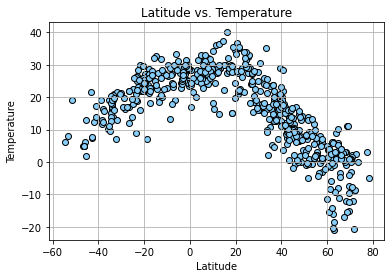

In [24]:
x = cities_df['Latitude']
y = cities_df['Temperature']

plt.scatter(x, y, color="lightskyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")
plt.grid()
plt.savefig("output_data/lat_temp.png")
plt.show()


#### Latitude vs. Temperature:
* This plot compares temperatures with latitude.
* The plot shows that there is a stong correlation between temperature and latitude.  The closer the latitude is to zero, the warmer the temperature is.

## Latitude vs. Humidity Plot

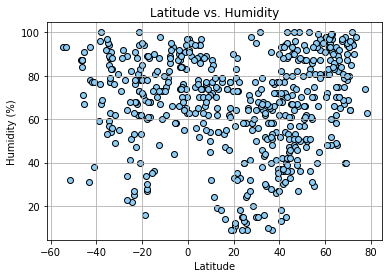

In [25]:
x = cities_df['Latitude']
y = cities_df['Humidity']

plt.scatter(x, y, color="lightskyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs. Humidity")
plt.grid()
plt.savefig("output_data/lat_hum.png")
plt.show()

#### Latitude vs. Humidity:
* This plot compares humidity with latitude.
* The plot shows that there is perhaps only a slight correlation between humidity and latitude.  It appears that between 10 and 50 degrees latitude, the humidity does drop slighly.

## Latitude vs. Cloudiness Plot

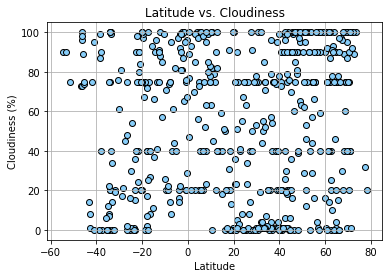

In [26]:
x = cities_df['Latitude']
y = cities_df['Cloudiness']

plt.scatter(x, y, color="lightskyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs. Cloudiness")
plt.grid()
plt.savefig("output_data/lat_cloud.png")
plt.show()

#### Latitude vs. Cloudiness:
* This plot compares cloudiness with latitude.
* The plot shows that there does not appear to be a correlation between cloudiness and latitude.  The cloudiness percentage is pretty consistent across latitude.

## Latitude vs. Wind Speed Plot

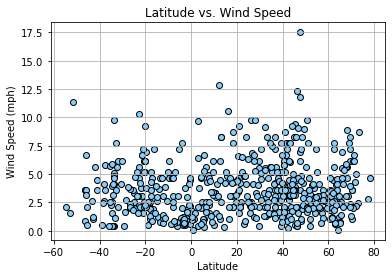

In [27]:
x = cities_df['Latitude']
y = cities_df['Wind_Speed']

plt.scatter(x, y, color="lightskyblue", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs. Wind Speed")
plt.grid()
plt.savefig("output_data/lat_wind.png")
plt.show()

#### Latitude vs. Wind Speed:
* This plot compares wind speed with latitude.
* The plot shows that there does not appear to be a correlation between wind speed and latitude.  The wind speed is very consistent across latitude.

## Linear Regression

In [28]:
# Separate northern and southern hemisphere data
no_hem_df = cities_df.loc[cities_df['Latitude'] >= 0]
so_hem_df = cities_df.loc[cities_df['Latitude'] < 0]
no_hem_df.to_csv("output_data/no_hem.csv")
so_hem_df.to_csv("output_data/so_hem.csv")

In [29]:
no_hem_df.head()

,City,Temperature,Latitude,Longitude,Cloudiness,Wind_Speed,Humidity
1,broome,7.46,42.2506,-75.8330,26,1.79,54
2,atar,35.20,20.5169,-13.0499,23,6.59,11
3,mudgal,27.31,16.0167,76.4333,50,10.57,47
4,bathsheba,29.00,13.2167,-59.5167,40,8.23,54
6,jamestown,8.70,42.0970,-79.2353,1,3.60,36


In [30]:
so_hem_df.head()

,City,Temperature,Latitude,Longitude,Cloudiness,Wind_Speed,Humidity
0,rikitea,25.04,-23.1203,-134.9692,15,3.09,76
5,castro,22.44,-24.7911,-50.0119,30,3.31,51
7,cape town,17.65,-33.9258,18.4232,20,4.12,77
10,bambous virieux,25.26,-20.3428,57.7575,75,6.17,78
11,ushuaia,6.00,-54.8000,-68.3000,90,2.06,93


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [31]:
import scipy.stats as st
correlation = st.pearsonr(no_hem_df['Latitude'], no_hem_df['Temperature'])

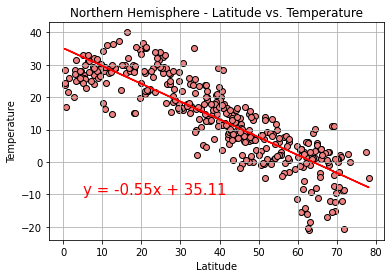

In [32]:
# Calculate the regression values and line eq for plotting
x_values = no_hem_df['Latitude']
y_values = no_hem_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values, color="lightcoral", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,-10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere - Latitude vs. Temperature")
plt.grid()
plt.savefig("output_data/no_hem_lat_temp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

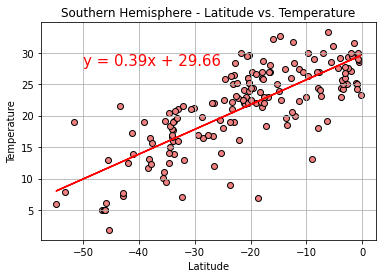

In [33]:
correlation = st.pearsonr(so_hem_df['Latitude'], so_hem_df['Temperature'])
# Calculate the regression values and line eq for plotting
x_values = so_hem_df['Latitude']
y_values = so_hem_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values, color="lightcoral", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,28),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere - Latitude vs. Temperature")
plt.grid()
plt.savefig("output_data/so_hem_lat_temp.png")
plt.show()

#### Hemispheres - Latitude vs. Temperature:
* These plots compare temperatures with latitude in the Northern and Southern Hemispheres.
* The plot shows that there is a stong correlation between temperature and latitude in Northern Hemisphere.  The closer the latitude is to zero, the warmer the temperature is.
* It also shows that there is a stong correlation between temperature and latitude in the Southern Hemisphere.  The closer the latitude is to zero, the warmer the temperature is.  
* Even thought the correlation is still strong, it does not appear to be quite as strong as the Northern Hemisphere correlation is.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

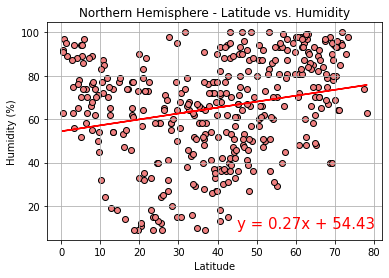

In [34]:
correlation = st.pearsonr(no_hem_df['Latitude'], no_hem_df['Humidity'])
# Calculate the regression values and line eq for plotting
x_values = no_hem_df['Latitude']
y_values = no_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values, color="lightcoral", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Latitude vs. Humidity")
plt.grid()
plt.savefig("output_data/no_hem_lat_hum.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

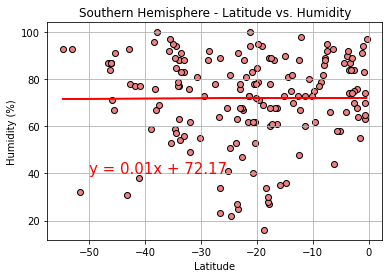

In [38]:
correlation = st.pearsonr(so_hem_df['Latitude'], so_hem_df['Humidity'])
# Calculate the regression values and line eq for plotting
x_values = so_hem_df['Latitude']
y_values = so_hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values, color="lightcoral", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Latitude vs. Humidity")
plt.grid()
plt.savefig("output_data/so_hem_lat_hum.png")
plt.show()

#### Hemispheres - Latitude vs. Humidity:
* These plots compare humidity with latitude in the Northern and Southern Hemispheres.
* The plot shows that there appears to very slight correlation between humidity and latitude in Northern Hemisphere.  As we move further away from zero, the humidity percentage increases slightly.
* It also shows that there doesn't appear to be much correlation between humidity and latitude in the Southern Hemisphere.  It appears that between -27 and -17 degrees latitude, the humidity does possibly drop slighly though.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

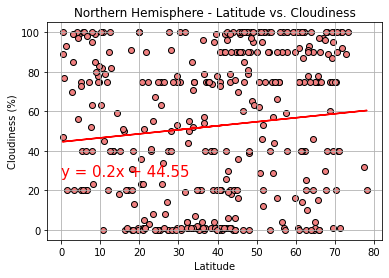

In [42]:
correlation = st.pearsonr(no_hem_df['Latitude'], no_hem_df['Cloudiness'])
# Calculate the regression values and line eq for plotting
x_values = no_hem_df['Latitude']
y_values = no_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values, color="lightcoral", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,27),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Latitude vs. Cloudiness")
plt.grid()
plt.savefig("output_data/no_hem_lat_cloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

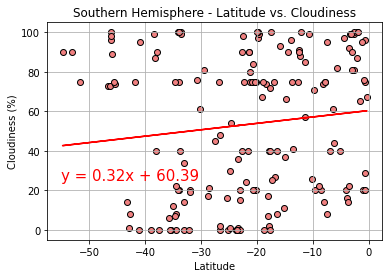

In [40]:
correlation = st.pearsonr(so_hem_df['Latitude'], so_hem_df['Cloudiness'])
# Calculate the regression values and line eq for plotting
x_values = so_hem_df['Latitude']
y_values = so_hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values, color="lightcoral", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness")
plt.grid()
plt.savefig("output_data/so_hem_lat_cloud.png")
plt.show()

#### Hemispheres - Latitude vs. Cloudiness:
* These plots compare cloudiness with latitude in the Northern and Southern Hemispheres.
* The plot shows that there appears no correlation between cloudiness and latitude in Northern Hemisphere.  
* It also shows that there doesn't appear to be any correlation between cloudiness and latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

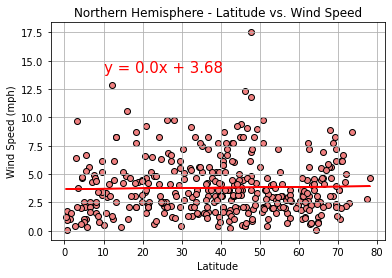

In [44]:
correlation = st.pearsonr(no_hem_df['Latitude'], no_hem_df['Wind_Speed'])
# Calculate the regression values and line eq for plotting
x_values = no_hem_df['Latitude']
y_values = no_hem_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values, color="lightcoral", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,14),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Latitude vs. Wind Speed")
plt.grid()
plt.savefig("output_data/no_hem_lat_wind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

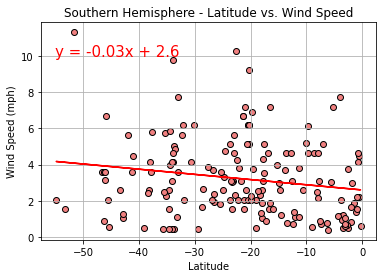

In [45]:
correlation = st.pearsonr(so_hem_df['Latitude'], so_hem_df['Wind_Speed'])
# Calculate the regression values and line eq for plotting
x_values = so_hem_df['Latitude']
y_values = so_hem_df['Wind_Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the linear regression model on top of the previous scatter plot.
plt.scatter(x_values,y_values, color="lightcoral", edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed")
plt.grid()
plt.savefig("output_data/so_hem_lat_wind.png")
plt.show()

#### Hemispheres - Latitude vs. Wind Speed:
* These plots compare wind speed with latitude in the Northern and Southern Hemispheres.
* The plot shows that there appears no correlation between wind speed and latitude in Northern Hemisphere.  
* It also shows that there doesn't appear to be any correlation between wind speed and latitude in the Southern Hemisphere.